# Spotify Data Analysis & Visualization

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [73]:
input = pd.read_csv("C:/Users/Asmita shetty/Downloads/songs_normalize.csv")

In [74]:
input.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [75]:
input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


* artist: Name of the Artist.
* song: Name of the Track.
* duration_ms: Duration of the track in milliseconds.
* explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
* year: Release Year of the track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* genre: Genre of the track.

In [76]:
# missing values
input.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [77]:
input.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [78]:
input.drop_duplicates(inplace=True)

In [79]:
input.shape #(rows, col)

(1941, 18)

In [80]:
input.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


Exploratory Data Analysis

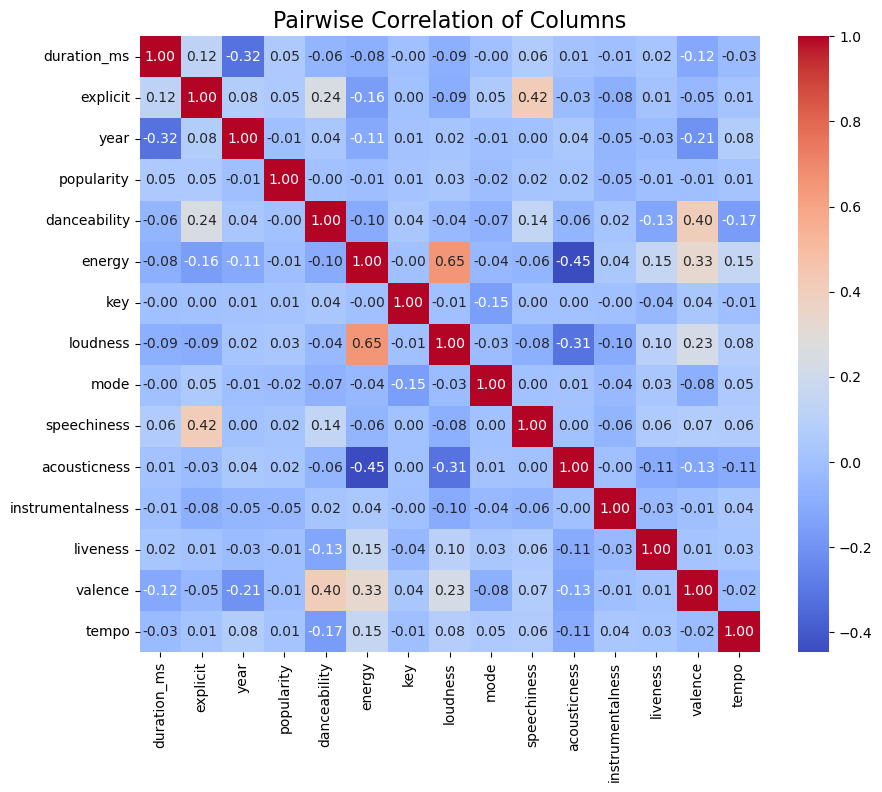

In [81]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Generate the heatmap with correlation values displayed
sns.heatmap(input.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

# Set the title
plt.title('Pairwise Correlation of Columns', fontsize=16, loc='center')

# Display the plot
plt.show()


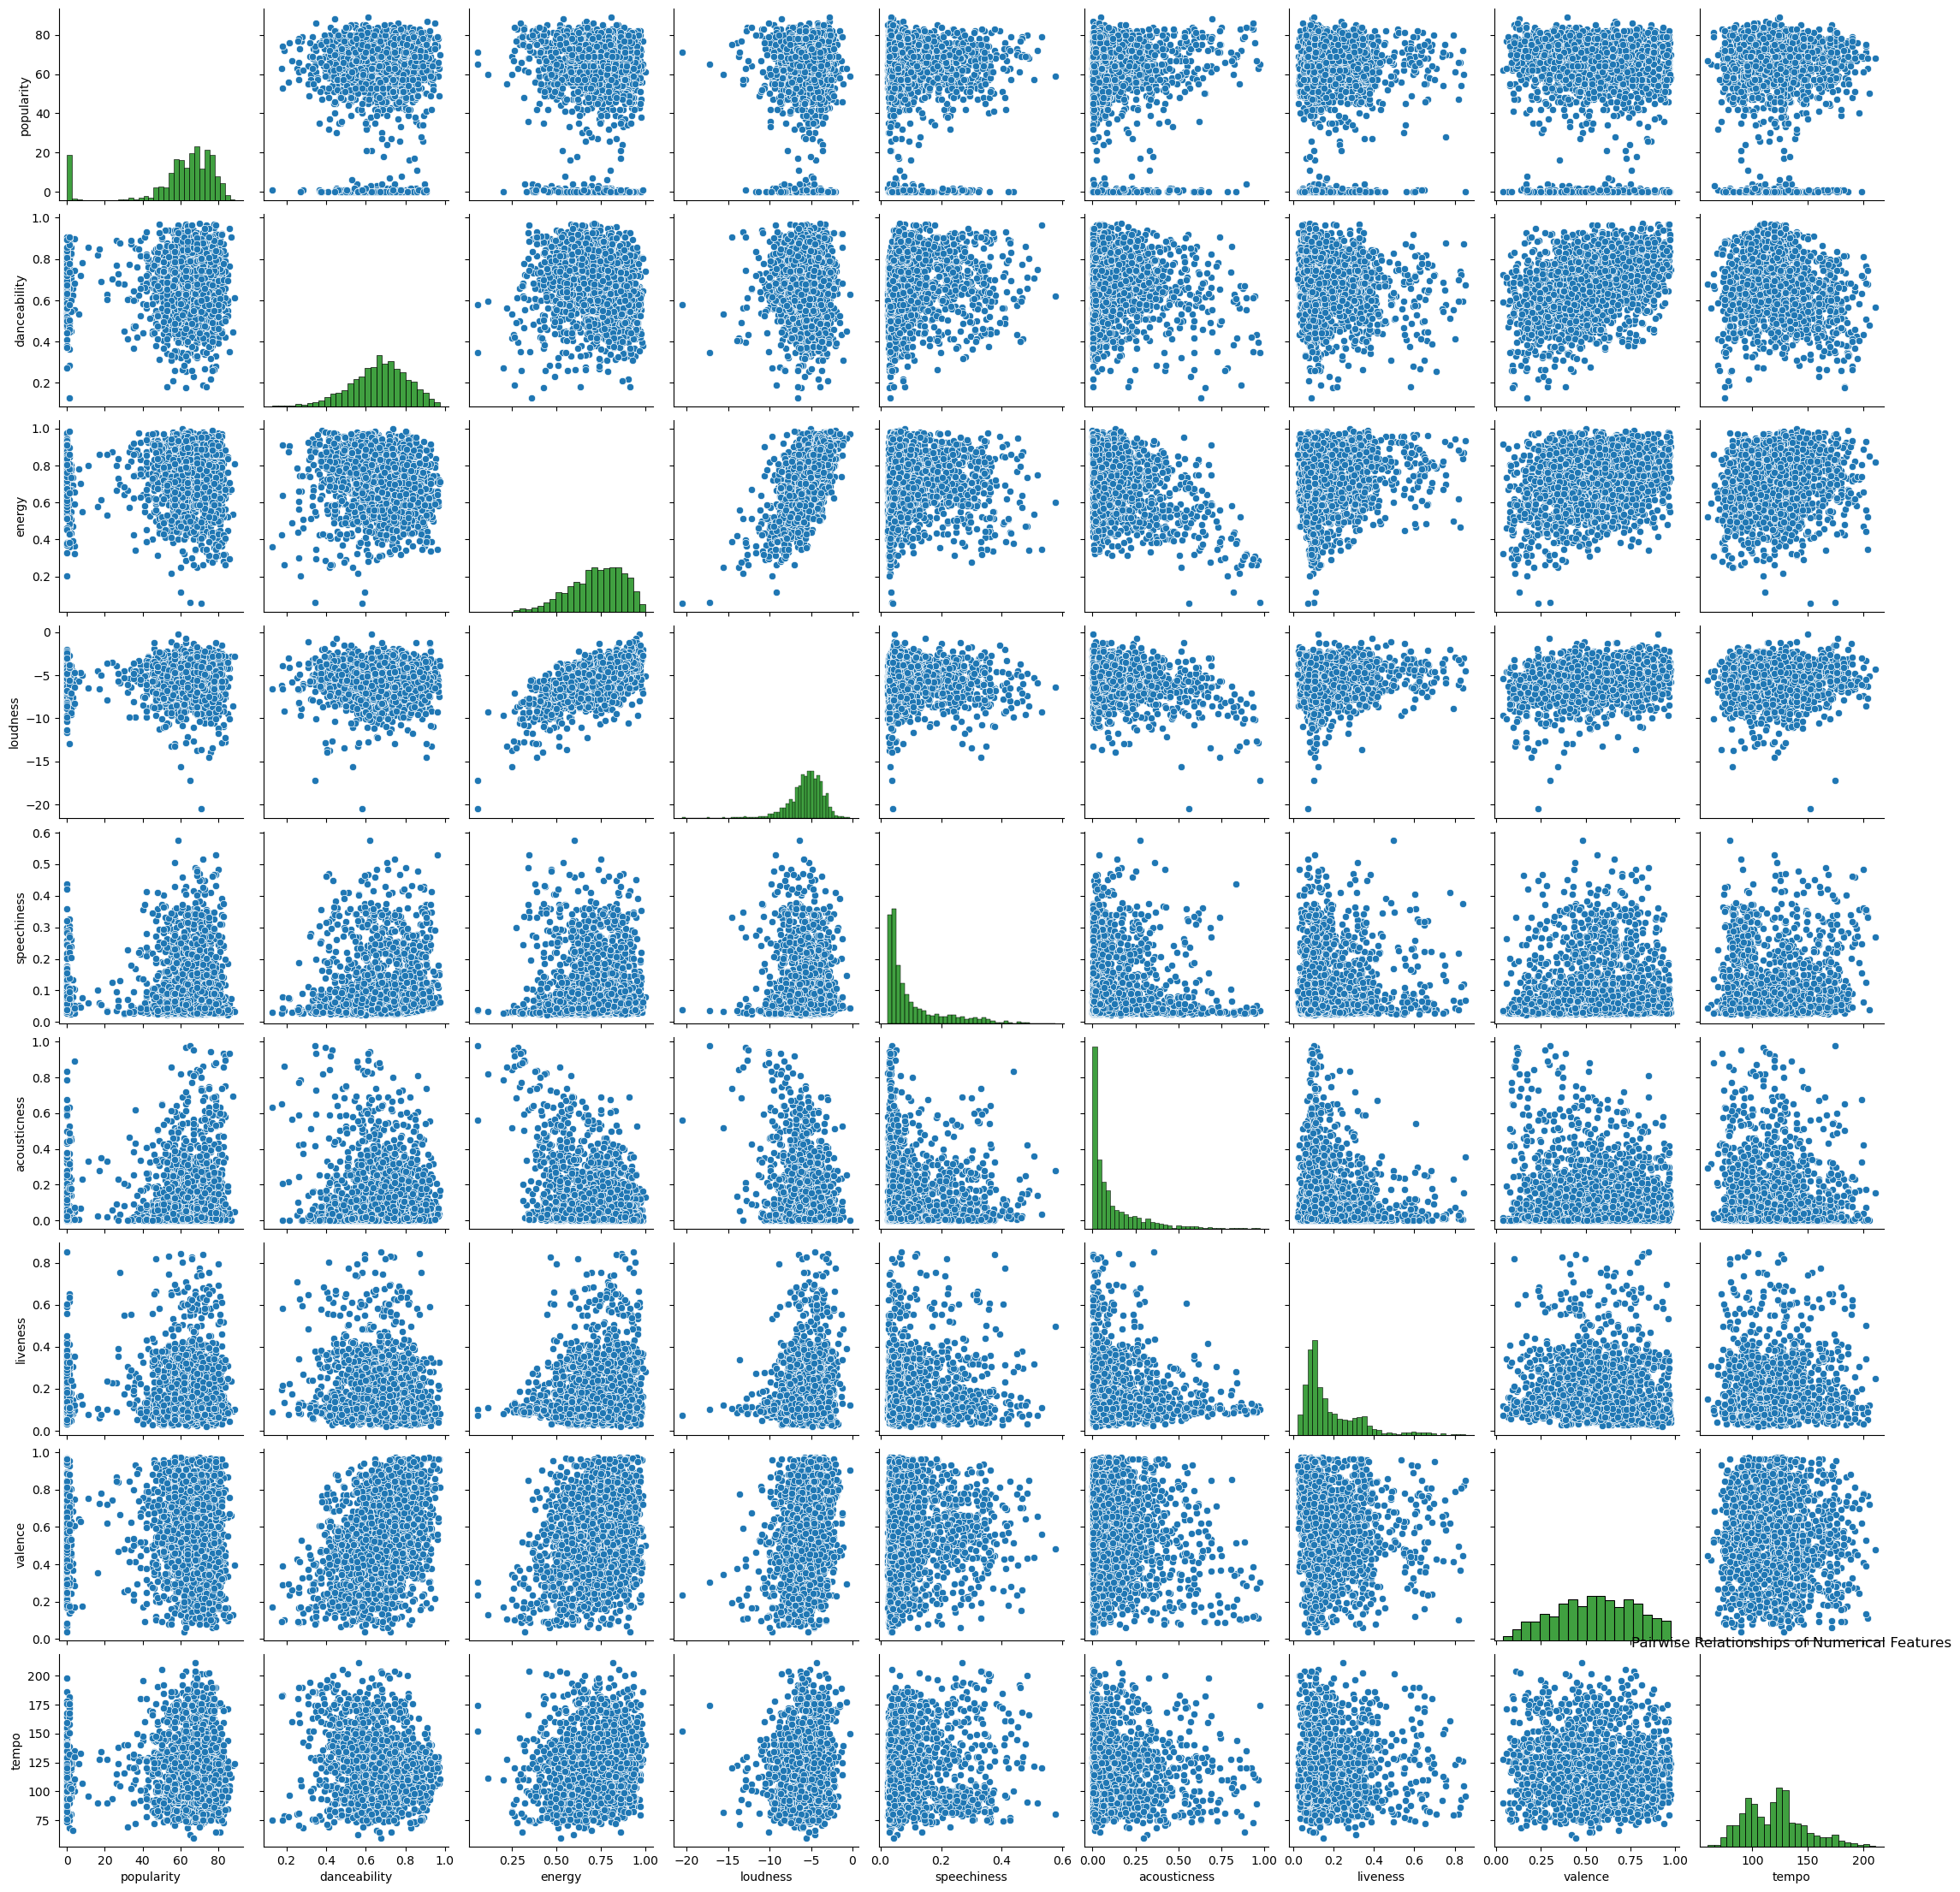

In [82]:
# Selecting relevant numerical columns for pairplot
numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 
                     'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']
sns.pairplot(input[numerical_columns],kind='scatter', diag_kind='hist', diag_kws={'color': 'green'})

# Adding title to the pairplot
plt.title('Pairwise Relationships of Numerical Features')
plt.show()


In [83]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=input['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=input['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=input['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=input['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=input['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=input['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=input['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=input['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=input['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900, title_text='<b>Feature Distribution', title_x=0.5)

Row 1, Column 1 - popularity:

Histogram: This subplot will show the distribution of the popularity feature.
Insight: This can reveal whether most songs in the dataset are relatively popular or not. A right-skewed distribution would suggest that more songs are highly popular, while a left-skewed distribution would indicate many songs are less popular.

Row 1, Column 2 - danceability:

Histogram: This will depict the distribution of danceability, a feature indicating how suitable a track is for dancing.
Insight: The shape of the distribution can show if the dataset has more tracks that are generally danceable (higher values) or less danceable (lower values).

Row 1, Column 3 - energy:

Histogram: This shows the distribution of the energy feature, which measures the intensity and activity of the track.
Insight: You can infer whether the dataset consists of more high-energy tracks (e.g., energetic, fast songs) or low-energy tracks (e.g., mellow, calm songs).

Row 2, Column 1 - loudness:

Histogram: This subplot will depict the distribution of loudness, which represents the overall volume level of the track.
Insight: The distribution can show the average loudness level of tracks in the dataset. A higher concentration in certain ranges could indicate a trend toward louder or softer tracks.

Row 2, Column 2 - speechiness:

Histogram: This will show the distribution of speechiness, indicating the presence of spoken words in a track.
Insight: A higher concentration of values near 0 suggests most tracks are purely musical with little speech, while higher values indicate more spoken-word content, such as podcasts or rap.

Row 2, Column 3 - acousticness:

Histogram: This subplot will depict the distribution of acousticness, a measure of how acoustic the track is.
Insight: If most values are high, it suggests a majority of tracks are acoustic, whereas lower values indicate more electronic or synthesized tracks.

Row 3, Column 1 - liveness:

Histogram: This shows the distribution of liveness, which measures the presence of a live audience in the recording.
Insight: A high concentration of values close to 1 would suggest that many tracks are live recordings, while lower values indicate studio recordings.

Row 3, Column 2 - valence:

Histogram: This subplot depicts the distribution of valence, which indicates the musical positivity of the track.
Insight: Tracks with higher valence sound more positive and cheerful, while those with lower valence might sound more sad or serious. The distribution can show the general mood of the tracks in the dataset.

Row 3, Column 3 - tempo:

Histogram: This will show the distribution of tempo, the speed or pace of a track measured in beats per minute (BPM).
Insight: You can observe whether the dataset includes more fast-paced tracks or slower ones, which can influence the overall vibe of the dataset.

In [84]:
# Group by 'year' and count the number of 'song' entries per year
input_grouped = input.groupby('year', as_index=False).count().sort_values(by='song', ascending=False)

# Create an area chart with Plotly Express
fig = px.area(
    input_grouped,
    x='year',
    y='song',
    markers=True,
    labels={'song': 'Total Songs'},
    color_discrete_sequence=['pink'],
    title='<b>Year by Year Songs Collection</b>'
)

# Update layout for better hover and title positioning
fig.update_layout(
    hovermode='x',
    title_x=0.5
)

# Show the figure
fig.show()

Year 2012, 2017, and 2001 had the highest number of total song collection

In [85]:
fig = px.histogram(input.groupby('genre',as_index=False).count().sort_values(by='song', ascending = False), 
                   x = 'genre', y = 'song', color_discrete_sequence=['green'],
                   marginal='box',title='<b>Total songs based on Genres</b>')
fig.update_layout(title_x=0.5)

The Genre of most songs is pop

In [86]:
fig = px.histogram(input.groupby('genre',as_index=False).count().sort_values(by='popularity', ascending = False), 
                   x = 'genre', y = 'popularity', color_discrete_sequence=['green'],
                   marginal='box',title='<b>Popular Genres</b>')
fig.update_layout(title_x=0.5)

In [96]:
fig = px.bar(input.groupby('artist', as_index = False).count().sort_values(by = 'song', ascending = False),
             x='artist',y='song',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],
             text='song',title='<b> List of Songs Recorded by Each Singer')
fig.update_layout(title_x=0.5)

Rihanna and Drake are leading with 23 total songs

In [93]:
fig = px.bar(input.groupby('artist', as_index = False).count().sort_values(by = 'popularity', ascending = False).head(30),
             x='artist',y='popularity',labels={'song':'Total Songs'},width=1000,color_discrete_sequence=['green'],template='plotly_dark',
             text='popularity',title='<b>Top 30 Popular Singers')
fig.update_layout(title_x=0.5)

In [98]:
fig=px.line(input.sort_values(by='popularity',ascending=False).head(25),
            x='song',y='popularity',hover_data=['artist'],color_discrete_sequence=['green'],
            markers=True,title='<b> Top 25 songs in Spotify')
fig.show()

Sweater Weather is the most popular song